# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Import Dependancy**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Import csv file and put the data in data variable name
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 1:- ML Appetizer/Day 7/SeoulBikeData.csv', encoding = 'unicode_escape')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **Exploratory Data Analysis (EDA)**

In [ ]:
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Relationship b/w Rented Bike Count and Seasons**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Seasons')

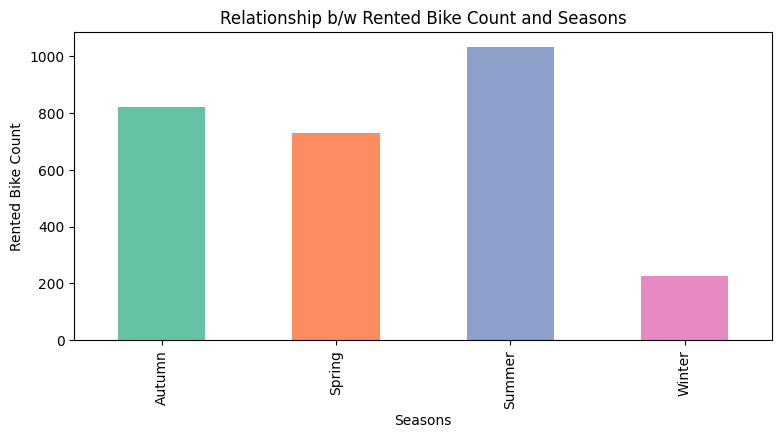

In [ ]:
plt.figure(figsize=(9,4))
df.groupby('Seasons')['Rented Bike Count'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Seasons')

### **Relationship b/w Rented Bike Count and Holiday**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Holiday')

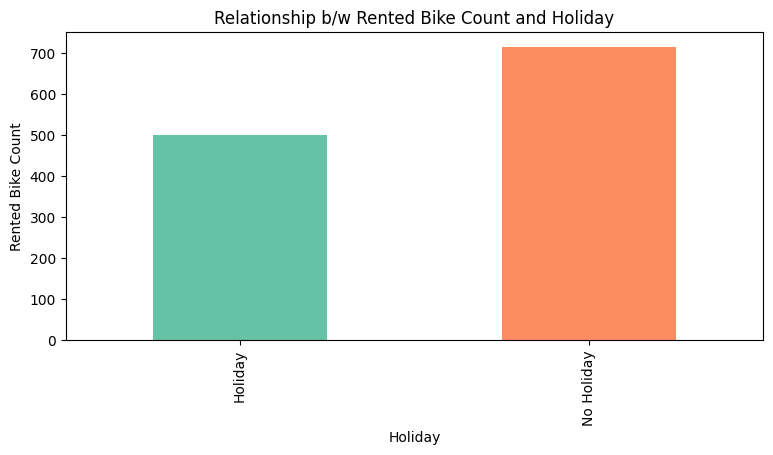

In [ ]:
plt.figure(figsize=(9,4))
df.groupby('Holiday')['Rented Bike Count'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Holiday')

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Holiday')

<Figure size 900x400 with 0 Axes>

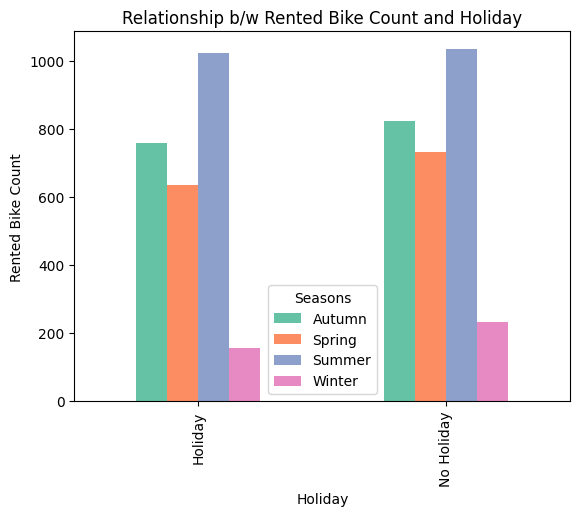

In [ ]:
plt.figure(figsize=(9,4))
df.groupby(['Holiday','Seasons'])['Rented Bike Count'].mean().unstack().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Holiday')

### **Relationship b/w Rented Bike Count and Temperature(°C)**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Temperature(°C)')

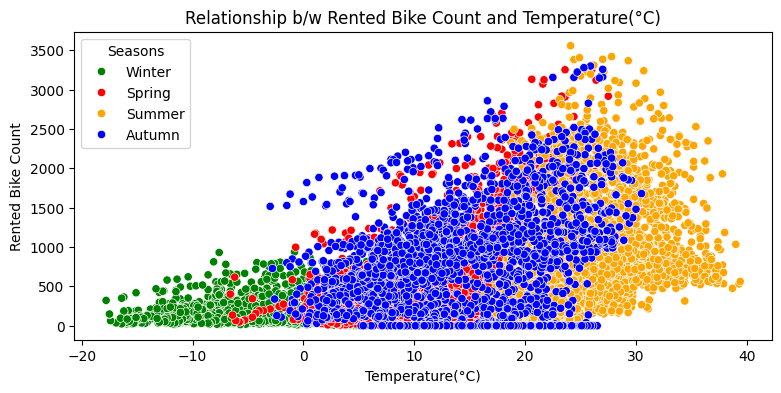

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='Temperature(°C)',y='Rented Bike Count',data=df,hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.xlabel('Temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Temperature(°C)')


### **Relationship b/w Rented Bike Count and Humidity(%)**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Humidity(%)')

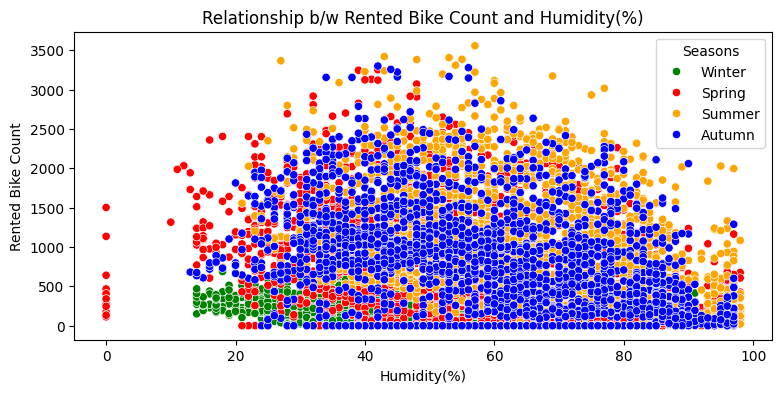

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='Humidity(%)',y='Rented Bike Count',data=df,hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Humidity(%)')


### **Relationship b/w Rented Bike Count and Wind speed (m/s)**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Wind speed (m/s)')

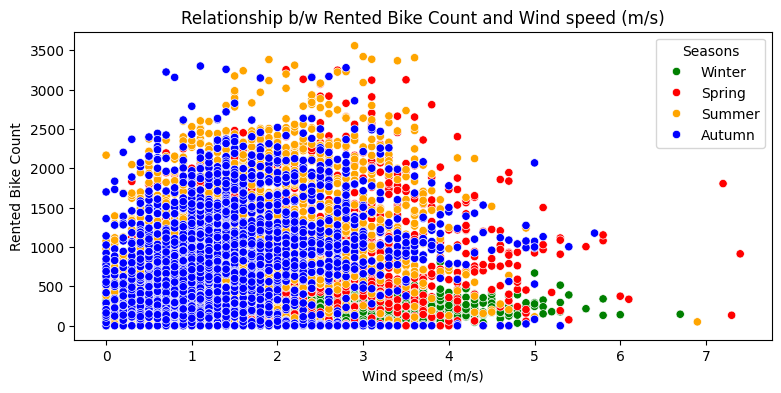

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='Wind speed (m/s)',y='Rented Bike Count',data=df,hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Wind speed (m/s)')


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Relationship b/w Rented Bike Count and Visibility (10m)**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Visibility (10m)')

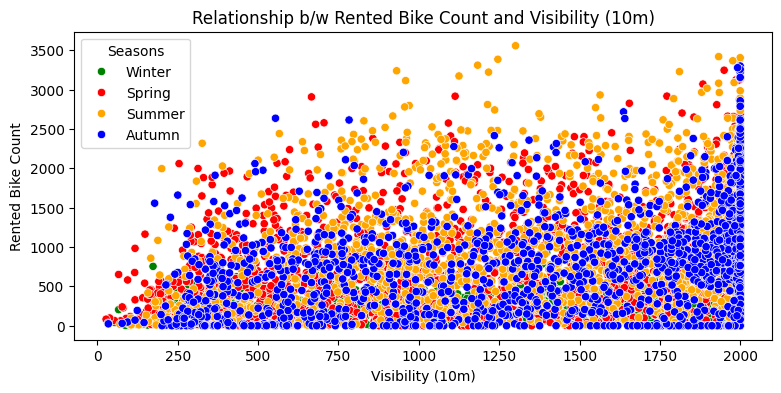

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='Visibility (10m)',y='Rented Bike Count',data=df,hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Visibility (10m)')


### **Relationship b/w Rented Bike Count and Solar Radiation (MJ/m2)**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Solar Radiation (MJ/m2)')

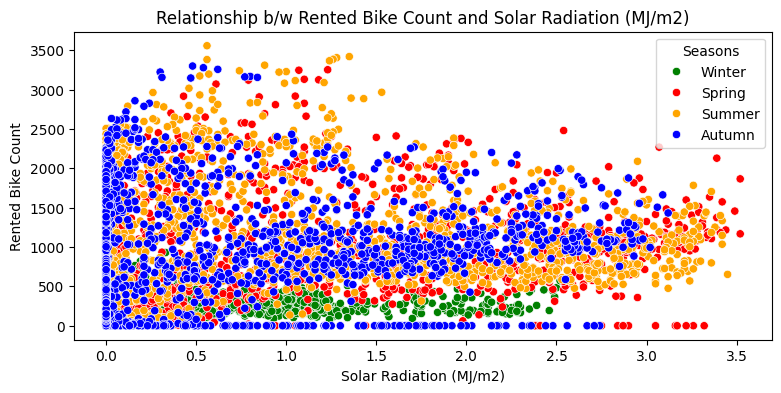

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='Solar Radiation (MJ/m2)',y='Rented Bike Count',data=df,hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Solar Radiation (MJ/m2)')


### **Relationship b/w Rented Bike Count and Rainfall(mm)**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Rainfall(mm)')

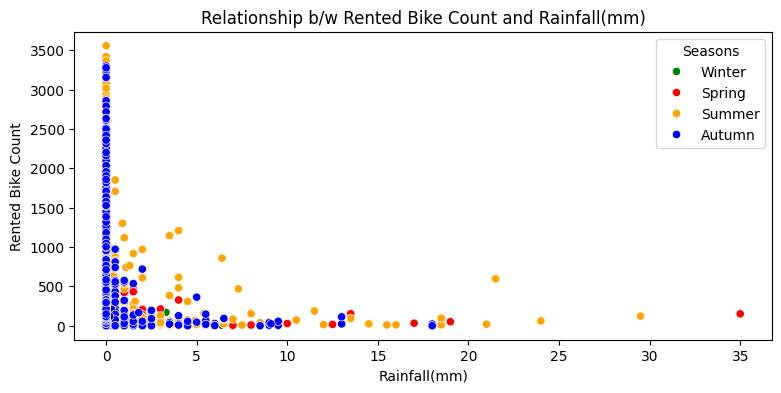

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='Rainfall(mm)',y='Rented Bike Count',data=df,hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Rainfall(mm)')


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### **Relationship b/w Rented Bike Count and Snowfall (cm)**

Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Snowfall (cm)')

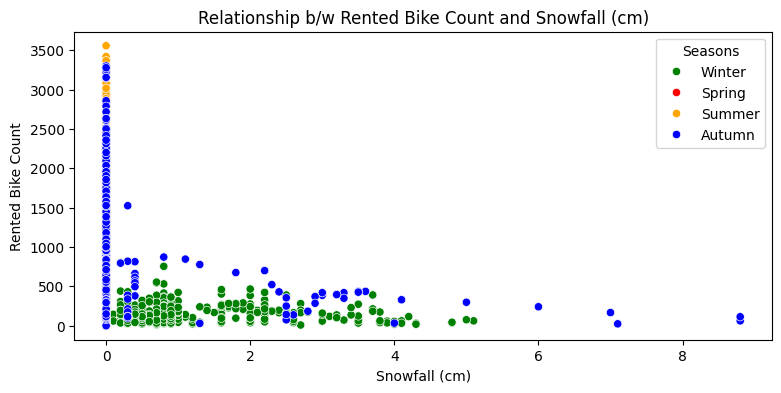

In [ ]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='Snowfall (cm)',y='Rented Bike Count',data=df,hue = df['Seasons'], palette=['green','red','orange','blue'])
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Snowfall (cm)')


Text(0.5, 1.0, 'Relationship b/w Rented Bike Count and Hour')

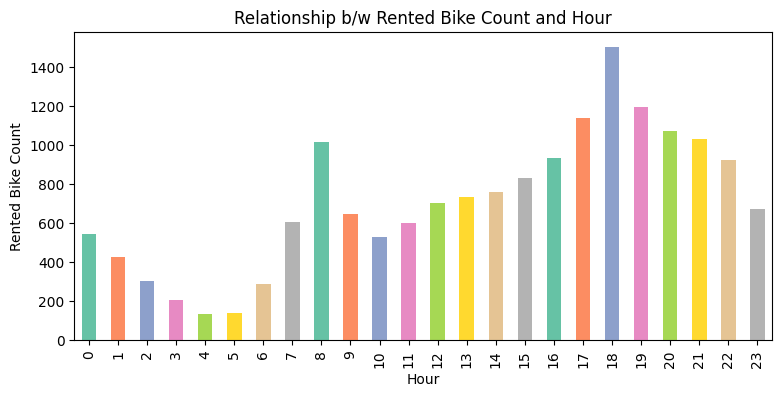

In [ ]:
plt.figure(figsize=(9,4))
df.groupby('Hour')['Rented Bike Count'].mean().plot(kind='bar',color = sns.color_palette('Set2'))
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.title('Relationship b/w Rented Bike Count and Hour')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df['Functioning Day'].value_counts()

,count
Functioning Day,
Yes,8465
No,295


In [ ]:
df.groupby('Functioning Day')['Rented Bike Count'].sum()

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


## **Feature Engineering**

### **Correlation & scatter  plot 'Rented Bike Count'**

In [ ]:
num_features = df.describe().columns
num_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

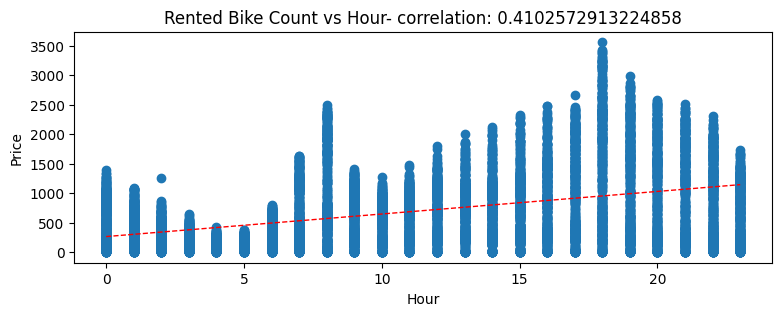

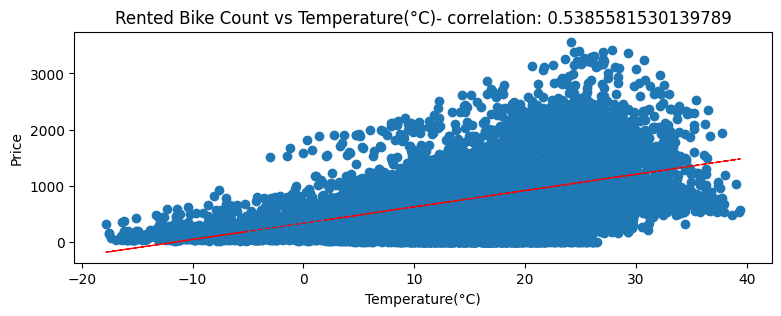

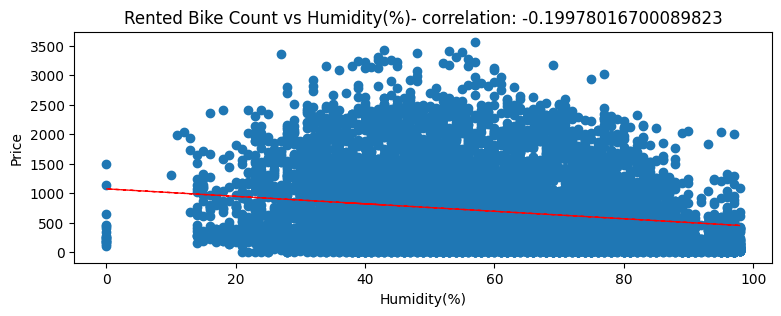

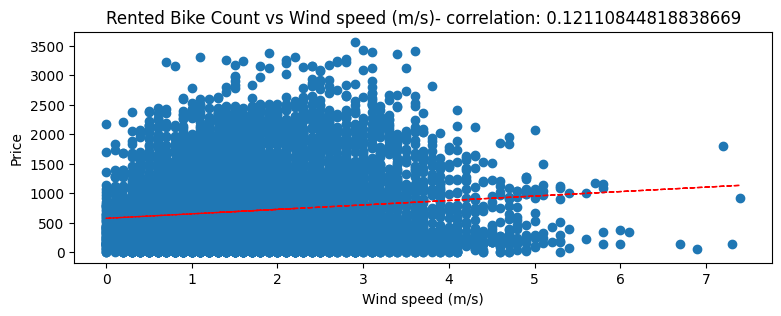

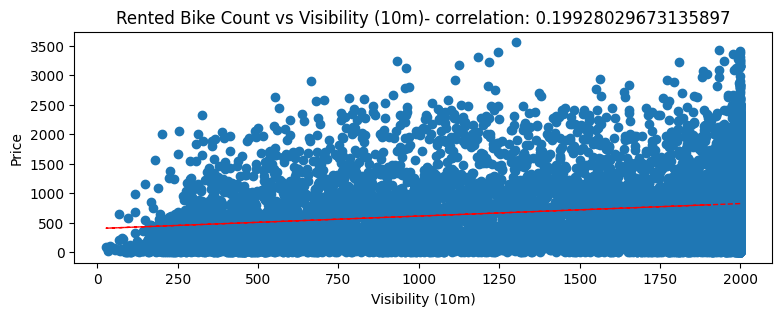

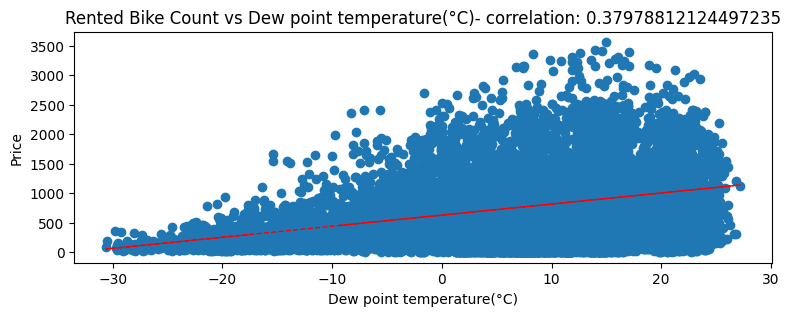

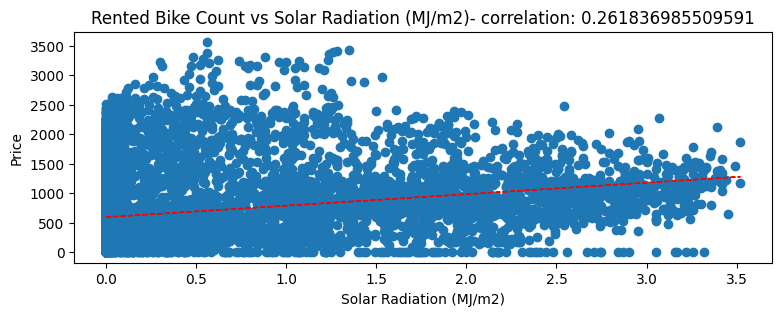

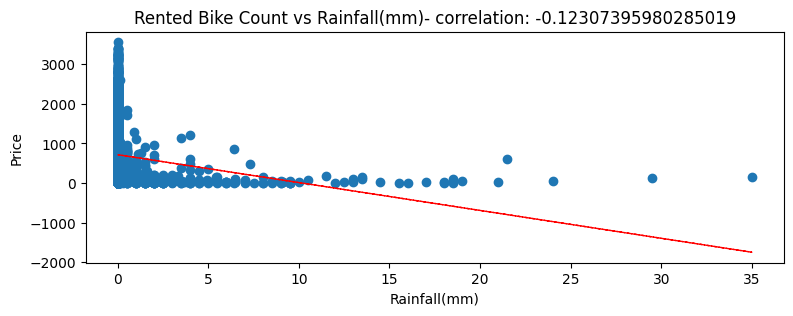

In [ ]:
# Correlation & scatter plot 'Rented Bike Count'
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,3))
  ax = fig.gca()
  feature =(df[col])
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)


plt.show()

### **Feature incoding And creation**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format= '%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df['day_name'] = df['Date'].dt.day_name()
df['month_name'] = df['Date'].dt.month_name()
df['year'] = df['Date'].map(lambda x: x.year).astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_name,month_name,year
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [ ]:
df['Day_week'] = df['day_name'].apply(lambda x: 'weekend' if x in ['Saturday','Sunday'] else 'weekday')
df.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_name,month_name,year,Day_week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,weekday


<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

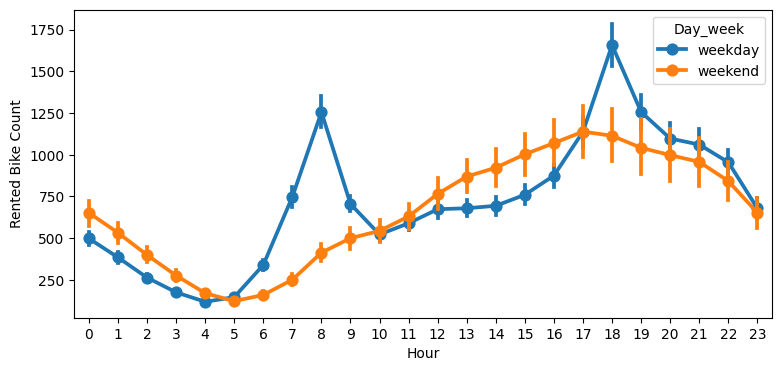

In [ ]:
plt.figure(figsize=(9,4))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['Day_week'])

In [ ]:
# defining a function for distribute hour column
def hour(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'

In [ ]:
df['Hour'] = df['Hour'].apply(hour)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_name,month_name,year,Day_week
0,2017-12-01,254,Night,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,weekday
1,2017-12-01,204,Night,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,weekday
2,2017-12-01,173,Night,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,weekday
3,2017-12-01,107,Night,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,weekday
4,2017-12-01,78,Night,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,weekday


#### **Correlation**

In [ ]:
int_columns_df = df.select_dtypes(include=['int', 'float'])
df_corr = int_columns_df.corr()
df_corr

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<Axes: >

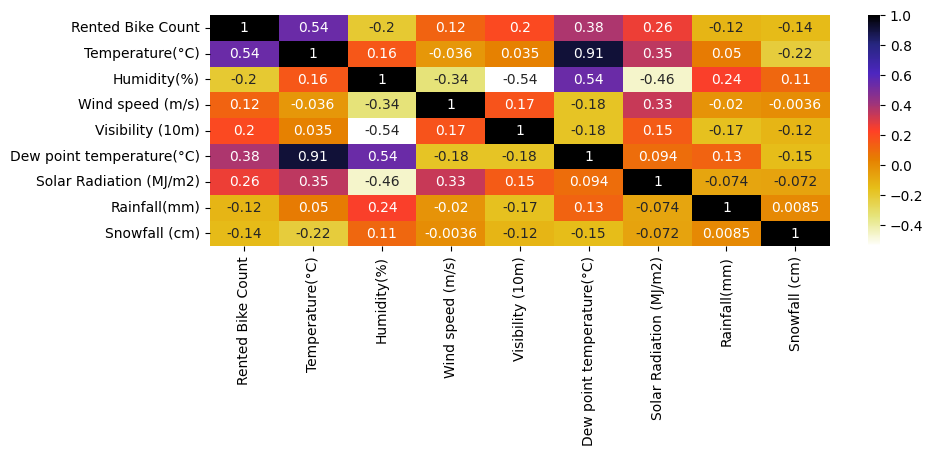

In [ ]:
plt.figure(figsize=(10,3))
sns.heatmap(df_corr,annot=True,cmap=plt.cm.CMRmap_r)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_name', 'month_name', 'year',
       'Day_week'],
      dtype='object')

In [ ]:
df.drop(columns = ['Dew point temperature(°C)'],axis = 1,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     8760 non-null   datetime64[ns]
 1   Rented Bike Count        8760 non-null   int64         
 2   Hour                     8760 non-null   object        
 3   Temperature(°C)          8760 non-null   float64       
 4   Humidity(%)              8760 non-null   int64         
 5   Wind speed (m/s)         8760 non-null   float64       
 6   Visibility (10m)         8760 non-null   int64         
 7   Solar Radiation (MJ/m2)  8760 non-null   float64       
 8   Rainfall(mm)             8760 non-null   float64       
 9   Snowfall (cm)            8760 non-null   float64       
 10  Seasons                  8760 non-null   object        
 11  Holiday                  8760 non-null   object        
 12  Functioning Day          8760 non-

In [ ]:
df = pd.get_dummies(df,drop_first=True,sparse=True)
df.head()

,Date,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_Morning,...,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,year_2018,Day_week_weekend
0,2017-12-01,254,-5.2,37,2.2,2000,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
1,2017-12-01,204,-5.5,38,0.8,2000,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
2,2017-12-01,173,-6.0,39,1.0,2000,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
3,2017-12-01,107,-6.2,40,0.9,2000,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
4,2017-12-01,78,-6.0,36,2.3,2000,0.0,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Date                     8760 non-null   datetime64[ns]     
 1   Rented Bike Count        8760 non-null   int64              
 2   Temperature(°C)          8760 non-null   float64            
 3   Humidity(%)              8760 non-null   int64              
 4   Wind speed (m/s)         8760 non-null   float64            
 5   Visibility (10m)         8760 non-null   int64              
 6   Solar Radiation (MJ/m2)  8760 non-null   float64            
 7   Rainfall(mm)             8760 non-null   float64            
 8   Snowfall (cm)            8760 non-null   float64            
 9   Hour_Morning             1 non-null      Sparse[bool, False]
 10  Hour_Night               1 non-null      Sparse[bool, False]
 11  Hour_Noon                1 non

/tmp/ipython-input-38-3771845804.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


In [ ]:
x = df.drop(columns=['Rented Bike Count','Date'],axis=1)
y = df['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
x_train

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Hour_Morning,Hour_Night,Hour_Noon,...,month_name_January,month_name_July,month_name_June,month_name_March,month_name_May,month_name_November,month_name_October,month_name_September,year_2018,Day_week_weekend
8415,13.2,61,3.9,719,1.03,0.0,0.0,False,False,True,...,False,False,False,False,False,True,False,False,True,False
5049,22.9,86,1.7,538,0.76,0.0,0.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
8395,11.2,46,1.4,869,0.00,0.0,0.0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1535,-2.6,69,2.0,1434,0.00,0.0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
5518,27.2,73,1.5,1005,0.00,0.0,0.0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,29.9,74,2.0,1201,0.00,0.0,0.0,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5191,23.5,90,0.5,445,0.05,0.5,0.0,True,False,False,...,False,True,False,False,False,False,False,False,True,False
5390,29.5,62,2.7,1941,1.79,0.0,0.0,False,False,True,...,False,True,False,False,False,False,False,False,True,False
860,-3.4,51,1.1,1391,0.00,0.0,0.0,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [ ]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtyp

## **Model Implementation**

### **Import Dependancy**

In [ ]:
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)



  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    print('MAE Training ',mean_absolute_error(Y_train,model.predict(X_train)))
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  # Here we appending the parameters for all models


  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

Training score  = 0.6476405967651624
MAE Training  291.26393990079265
MAE : 294.3314562626718
MSE : 148371.82209744197
RMSE : 385.19063085366184
R2 : 0.6406727706624527
Adjusted R2 :  0.63112067856122 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


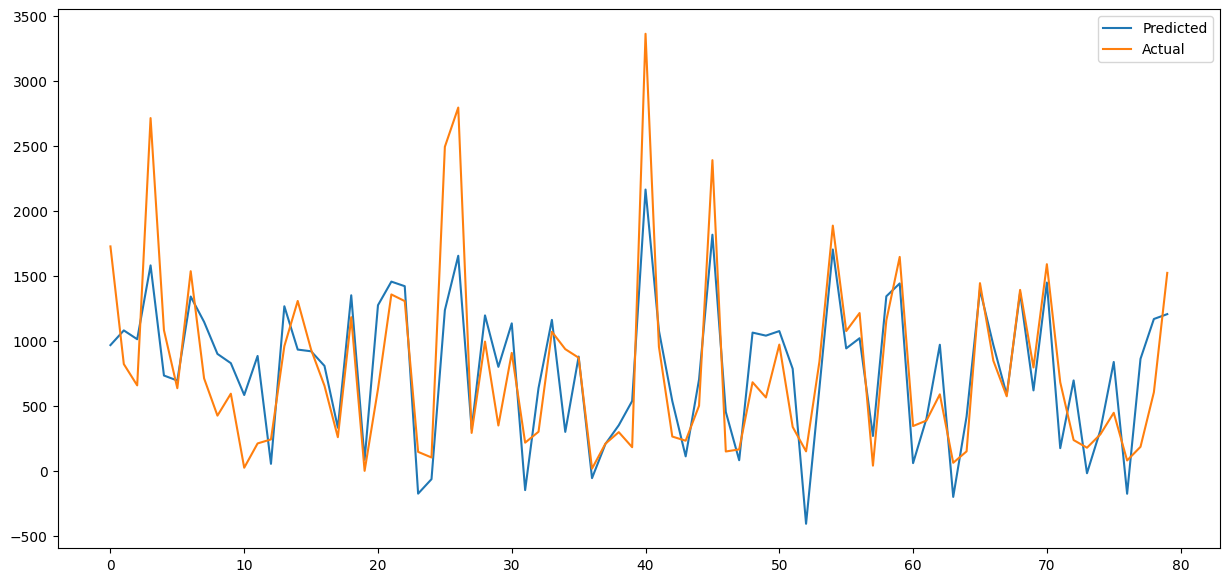

In [ ]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

Training score  = 0.6466992352103194
MAE Training  291.02832634696733
MAE : 294.15840990581194
MSE : 148678.57427010534
RMSE : 385.588607547092
R2 : 0.6399298775258839
Adjusted R2 :  0.630358036897174 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


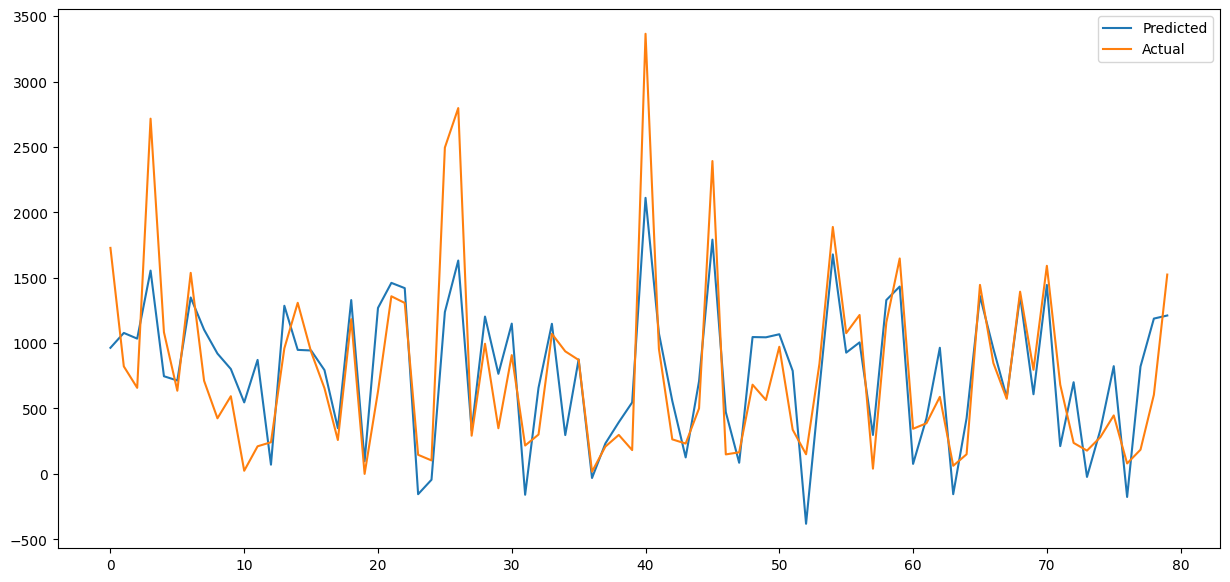

In [ ]:
score_metrix(Lasso(),x_train,x_test,y_train,y_test)

### **Lasso with hyperparameter tuning**

In [ ]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.744e+08, tolerance: 2.491e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.042e+08, tolerance: 2.490e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.259e+08, tolerance: 2.441e

Training score  = 0.6476404635316146
MAE Training  291.25982491933564
MAE : 294.32672672844586
MSE : 148371.97701026572
RMSE : 385.19083193952804
R2 : 0.6406723954942102
Adjusted R2 :  0.6311202934197795 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+07, tolerance: 3.101e+05
  model = cd_fast.enet_coordinate_descent(


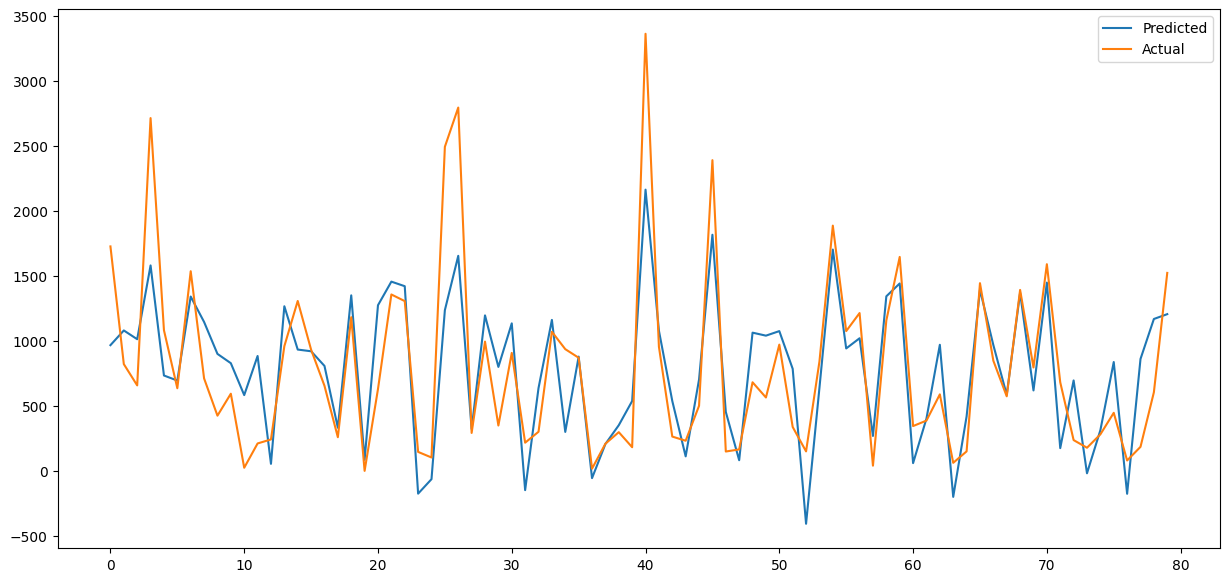

In [ ]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

### **Ridge with hyperparameter tuning**

Training score  = 0.6476382093442948
MAE Training  291.2313605432323
MAE : 294.29565102740924
MSE : 148366.28742037833
RMSE : 385.18344645165934
R2 : 0.6406861745564432
Adjusted R2 :  0.631134438774519 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


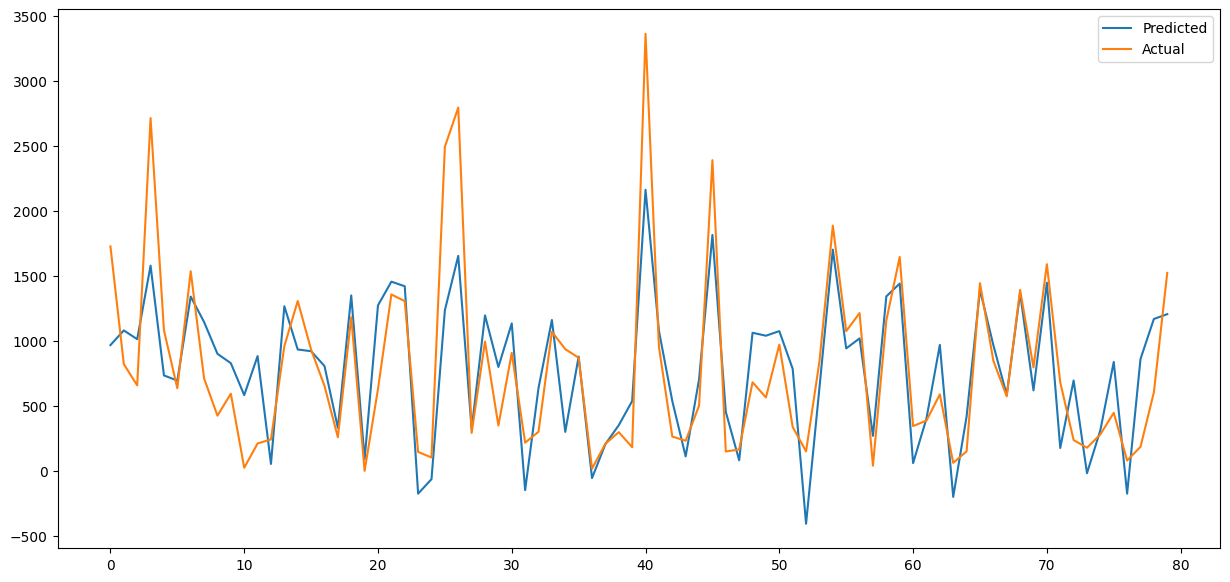

In [ ]:
score_metrix(Ridge(),x_train,x_test,y_train,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.13277e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Training score  = 0.6476320512237541
MAE Training  291.20560178739163
MAE : 294.2635641295405
MSE : 148363.02132969684
RMSE : 385.1792067722463
R2 : 0.6406940843825728
Adjusted R2 :  0.631142558869678 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


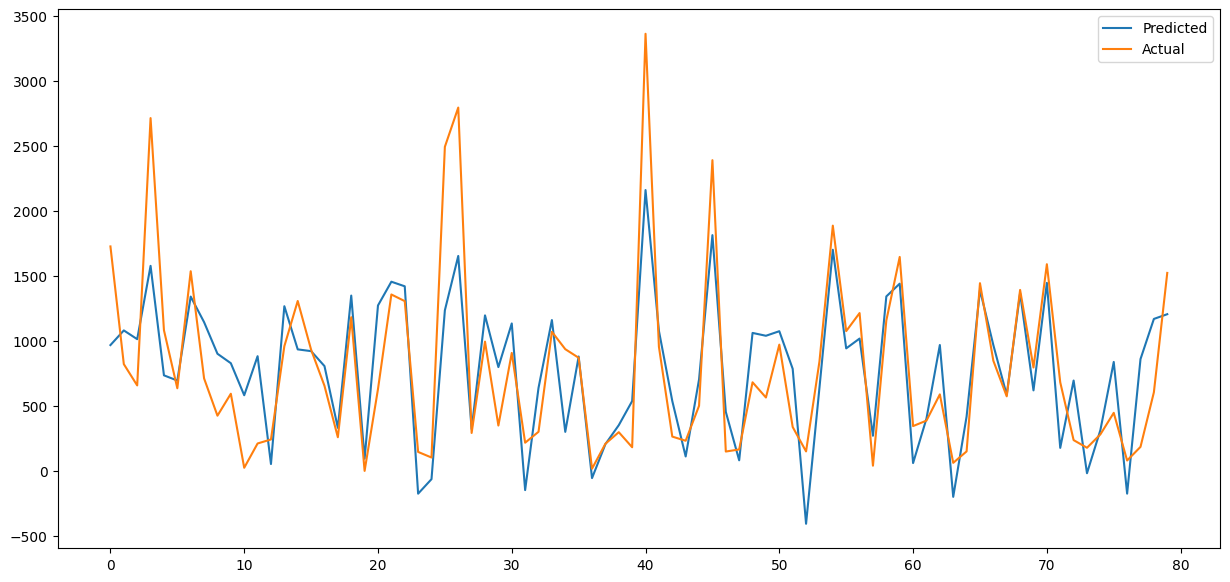

In [ ]:
L2 = Ridge() #creating variable
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]} # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=10) #using gridsearchcv and cross validate the model
score_metrix(L2_cv,x_train,x_test,y_train,y_test) # fit and evaluate model with score_matrix function

### **Polynomial**

In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

#### **LinearRegression**

Training score  = 0.8345417025361918
MAE Training  185.8945466340161
MAE : 199.9998830705101
MSE : 83854.87515537074
RMSE : 289.5770625504906
R2 : 0.7969200652113257
Adjusted R2 :  0.6095988954941006 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


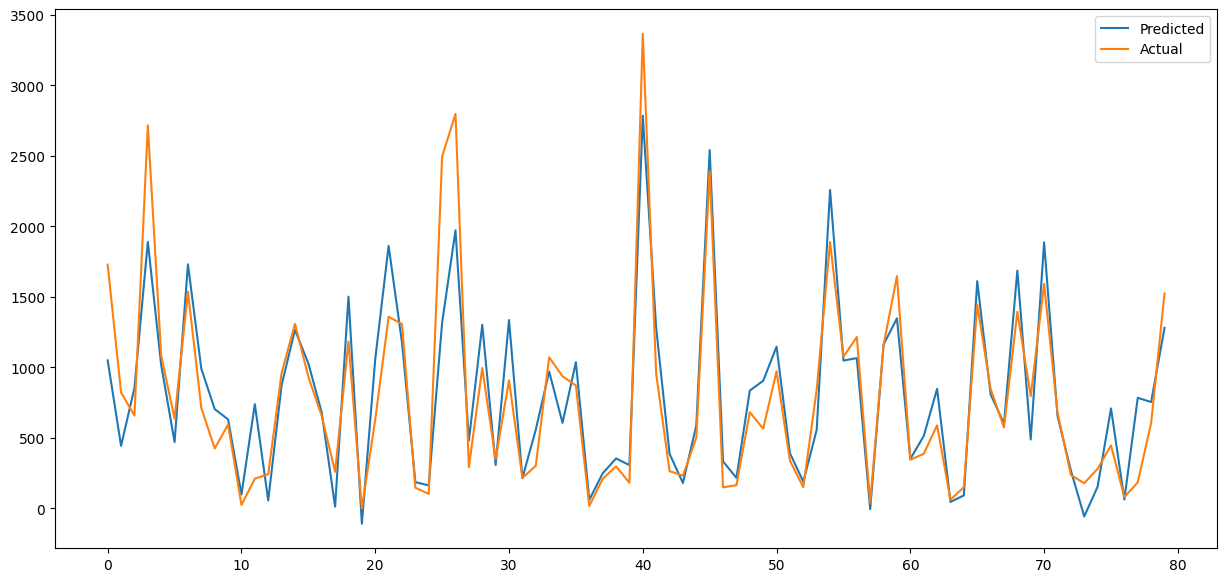

In [ ]:
score_metrix(LinearRegression(),x_train_poly,x_test_poly,y_train,y_test)

### **KNN Regressor**

In [ ]:
x_train[0]

array([1.08376963, 0.15625   , 0.92857143, 0.0028222 , 0.01075269,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
y_train.head(1)

,Rented Bike Count
5852,1441


Training score  = 0.8739293798161775
MAE Training  153.081923180231
MAE : 201.90791476407915
MSE : 94108.82828006089
RMSE : 306.77162235132
R2 : 0.7720870173052872
Adjusted R2 :  0.7660283453650055 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


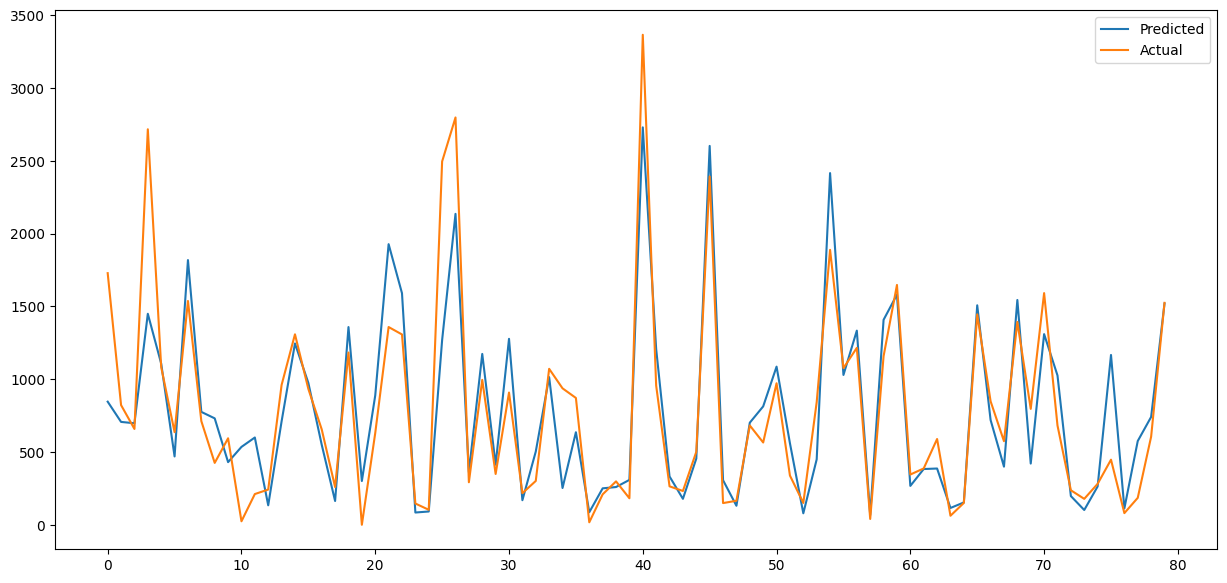

In [ ]:
score_metrix(KNeighborsRegressor(),x_train,x_test,y_train,y_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
import joblib

In [ ]:
joblib.dump(model,'knn.pkl')

['knn.pkl']